# Learning Gate - Reto: Covid-19 en México
## Data Science Fundamentals - Basic Python Concepts

### Importing Libraries

In [1]:
import os
import glob
import datetime 
import statistics
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

### Loading Data

#### Determine the file to Load

In [2]:
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))
case = 'Casos_confirmados'
#filename = [files[0].split('\\')[-1] for f in files if case.lower() in f.lower()][0]
filename = [f for f in files if case.lower() in f.lower()][0]

#### Reading content of the Selected File

In [3]:
file2read = open(filename,"r", encoding='utf-8')
file2review = []
first = True
for line in file2read:
    if first:
        headers = [line]
        first = False
    else:
        file2review.append(line)
file2read.close()

### Storing the loaded Data

#### Defining the data structure to use

In [4]:
format = '%Y-%m-%d'
headers = headers[0].replace('\n', '').split(',')
headers[0] = 'indexs'
Data = {}
for header in headers:
    Data[header] = []

for i in range(len(file2review)):
    for k, header in enumerate(headers):
        data_tmp = file2review[i].replace('\n', '').split(',')
        if k in [3,5]:
            if k == 3:
                Data[header].append(int(data_tmp[k]))
            elif k == 4:
                Data[header].append(datetime.datetime.strptime(data_tmp[k], format))
            else:
                Data[header].append(bool(data_tmp[k]))
        else:
            Data[header].append(data_tmp[k])

new_dates = []
for date in Data[headers[4]]:
    date_tmp = datetime.datetime.strptime(date, format)
    new_dates.append(datetime.datetime(date_tmp.year, date_tmp.month, day=1))

headers.append('month')
Data[headers[6]] = new_dates

In [5]:
Data

{'indexs': ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  

#### Displaying and Example of the Created Data Structure

In [5]:
for key in Data.keys():
    print('Header: ', key, '; Content: ', Data[key][0:3],  ' ...')

Header:  indexs ; Content:  ['0', '1', '2']  ...
Header:  State ; Content:  ['distrito federal', 'distrito federal', 'chihuahua']  ...
Header:  Sex ; Content:  ['MASCULINO', 'MASCULINO', 'FEMENINO']  ...
Header:  Age ; Content:  [28, 49, 67]  ...
Header:  Date ; Content:  ['2020-03-23', '2020-04-13', '2020-04-15']  ...
Header:  Confirmed ; Content:  [True, True, True]  ...
Header:  month ; Content:  [datetime.datetime(2020, 3, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0)]  ...


### Data Analysis

#### Continuous Time Analysis - Cases Behaviours

- ***Defining the dates for the analysis***

In [6]:
Dates = Data[headers[6]].copy()
Dates = list(set(Dates))
Dates.sort()

- ***Finding Cases Behaviours on the selected Dates***

In [7]:
# Creating variables and constants for the analysis
gndrs = list(set(Data[headers[2]]))
Hombres = []
Mujeres = []
Edad = []
Deteos = []

# Exploring the data behaviours on the selected dates
for dateo in Dates:

    men2 = 0
    women2 = 0
    age2 = 0
    tmp = [[sex, age, date] for [sex, age, date] in zip(Data[headers[2]],Data[headers[3]], Data[headers[6]]) if date==dateo]

    for item in tmp:
        if item[0] == gndrs[0]:
            men2 += 1
        elif item[0] == gndrs[1]:
            women2 += 1
        age2 += item[1]

    # Calculating metrics that summarize the continues time analysis
    Hombres.append(men2)#/(men2+women2))
    Mujeres.append(women2)#/(men2+women2))
    Edad.append(age2/len(tmp))
    Deteos.append(dateo)

- ***Plotting the continuous time analysis results***

C:\Users\alfde\AppData\Local\Temp\ipykernel_20696\2487925623.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Labels_Dates)


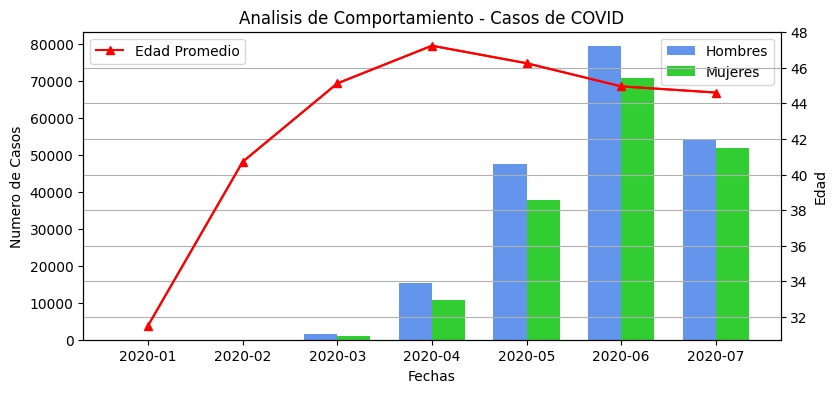

In [8]:
Labels_Dates = []
for date in Deteos:
    Labels_Dates.append(str(date.year)+'-0'+str(date.month))

x = np.arange(len(Deteos))  
width = 0.35 

fig, ax = plt.subplots(1,1 ,figsize=(9,4))
rects1 = ax.bar(x - width/2,Hombres, width, label='Hombres', color='cornflowerblue');
rects2 = ax.bar(x + width/2, Mujeres, width, label='Mujeres', color='limegreen');
ax.set_xticklabels(Labels_Dates)
ax.set_ylabel('Numero de Casos')
ax.set_xlabel('Fechas')
ax.legend()

axb = ax.twinx()
axb.plot(Labels_Dates,Edad, color = 'red', marker='^', label='Edad Promedio');
axb.plot(Labels_Dates, Edad, color = 'red');
axb.set_ylabel('Edad')
axb.grid()
axb.legend(loc='upper left')
plt.title('Analisis de Comportamiento - Casos de COVID');

### Summarizing Results from the Loaded Data

- ***Calculating the Results***

In [9]:
#Percentages
Hombres = sum([True for gndr in Data[headers[2]] if gndr == gndrs[0]])/len(Data[headers[0]])
Mujeres = sum([True for gndr in Data[headers[2]] if gndr == gndrs[1]])/len(Data[headers[0]])

#Average Age
Edad_prom = statistics.mean(Data[headers[3]])

- ***Plotting the summarized results***

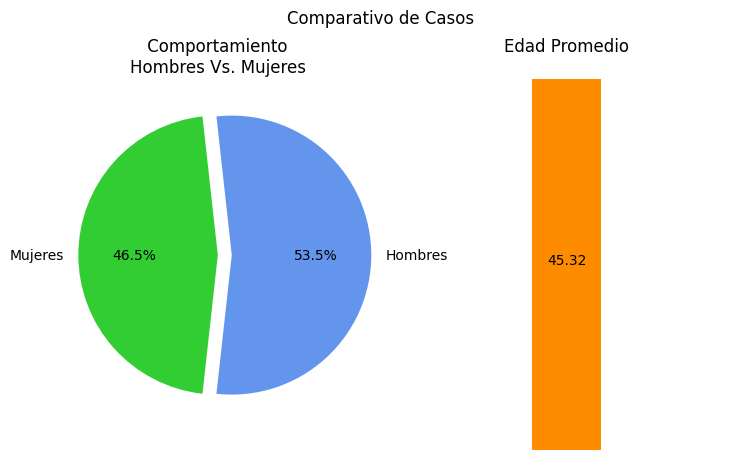

In [10]:

fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
fig.suptitle('Comparativo de Casos')
ratios = [Hombres, Mujeres]
labels = ['Hombres', 'Mujeres']
explode = [0.1, 0]
angle = -180 * ratios[0]
ax1.set_title(' Comportamiento \nHombres Vs. Mujeres')
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, colors=['cornflowerblue', 'limegreen']);

# bar chart parameters
xpos = 0
bottom = 0
ratios = [np.round(Edad_prom,2)]
width = .2
colors = ['darkorange', 'cornflowerblue', 'limegreen']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%s" % (ax2.patches[j].get_height()),
             ha='center')

ax2.set_title('Edad Promedio')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width);

### Conclusion

La información presentada permitió obtener hallazgos importantes, como determinar el número de incidencias de COVID para las fechas proporcionadas, así como la tendencia entre personas afectadas por el COVID dado características de los individuos como son el género y la edad. Sin embargo, aunque los hallazgos son informativos, siguiendo la pirámide DIKW, es necesaria más información para entender el porqué de dicho comportamiento, por ejemplo, si condiciones adicionales al COVID, comorbilidades, son las responsables de dichos comportamientos o si son factores independientes. No obstante, es un buen análisis inicial para tener una idea de cómo afecto el COVID a las personas durante las fechas proporcionadas.

# FIN